In [293]:
import matplotlib.pyplot as plt
import random

In [294]:
x = [n   + random.randint(-3, 3) for n in range(0, 100)]
y = [n*2 + random.randint(-3, 3) for n in range(0, 100)]

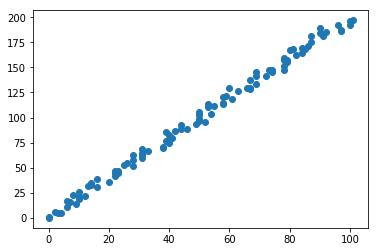

In [295]:
plt.scatter(x, y)
plt.show()

In [296]:
import pandas as pd

In [297]:
df = pd.DataFrame({
    "x": x,
    "y": y,
})

In [298]:
import tensorflow as tf

In [338]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = tf.estimator.LinearRegressor(
    feature_columns = [ tf.feature_column.numeric_column(key = "x") ],
    config = tf.estimator.RunConfig(),
)
tf.logging.set_verbosity(tf.logging.INFO)

In [339]:
def train_input_fn(df):
    dataset = tf.data.Dataset.from_tensor_slices(tensors = (dict(df[["x"]]), df["y"]))
    dataset = dataset.shuffle(10).repeat().batch(10)
    return dataset
model.train(input_fn = lambda: train_input_fn(df = df), steps = 300)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzvlkvmqy/model.ckpt.
INFO:tensorflow:loss = 2528.0, step = 1
INFO:tensorflow:global_step/sec: 1452.88
INFO:tensorflow:loss = 167.025, step = 101 (0.070 sec)
INFO:tensorflow:global_step/sec: 1782.43
INFO:tensorflow:loss = 157.34242, step = 201 (0.056 sec)
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpzvlkvmqy/model.ckpt.
INFO:tensorflow:Loss for final step: 347.383.


In [340]:
def predict(x):
    tf.logging.set_verbosity(tf.logging.ERROR)
    def predict_input_fn():
        dataset = tf.data.Dataset.from_tensors(tensors = { "x": [x] })
        dataset = dataset.batch(batch_size = 120)
        return dataset
    p = model.predict(lambda: predict_input_fn())
    r = list(p)[0]["predictions"][0]
    tf.logging.set_verbosity(tf.logging.INFO)
    return r

In [341]:
predict(30)

60.912247

In [361]:
feature_placeholders = { "x": tf.placeholder(tf.float64, [1], name="input_x") }
export_input_fn = tf.estimator.export.build_raw_serving_input_receiver_fn(feature_placeholders)
model.export_savedmodel("model", export_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Signatures EXCLUDED from export because they cannot be be served via TensorFlow Serving APIs:
INFO:tensorflow:'serving_default' : Regression input must be a single string Tensor; got {'x': <tf.Tensor 'input_x:0' shape=(?,) dtype=float64>}
INFO:tensorflow:'regression' : Regression input must be a single string Tensor; got {'x': <tf.Tensor 'input_x:0' shape=(?,) dtype=float64>}
INFO:tensorflow:Restoring parameters from /tmp/tmpzvlkvmqy/model.ckpt-300
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/temp-b'15576252

b'model/1557625293'

In [362]:
!saved_model_cli show --dir model/1557625293/ --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['predict']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['x'] tensor_info:
        dtype: DT_DOUBLE
        shape: (-1)
        name: input_x:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['predictions'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: linear/linear_model/linear_model/linear_model/weighted_sum:0
  Method name is: tensorflow/serving/predict


In [344]:
def predict_input_fn(x):
    dataset = tf.data.Dataset.from_tensors(tensors = { "x": [x] })
    dataset = dataset.batch(batch_size = 120)
    return dataset

In [352]:
def predict(x):
    p = model.predict(lambda: predict_input_fn(x))
    return list(p)[0]["predictions"][0]

In [355]:
predict(75)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzvlkvmqy/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


149.61488